In [23]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [6]:
df = pd.read_csv("https://raw.githubusercontent.com/DataThinkers/Datasets/main/DS/insurance.csv",sep=',')
df.to_csv("Insurance.csv",index=False)

SyntaxError: invalid syntax (1574544339.py, line 2)

In [8]:
data = pd.read_csv("Insurance.csv")
data.head() # Check first 5 records

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [10]:
data.tail() # Check last 5 records of the dataset

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [12]:

print("Number of rows :",data.shape[0])
print("Number of Columns :",data.shape[1])

Number of rows : 1338
Number of Columns : 7


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Check null values

In [17]:
data.isnull().sum() # No null values in dataset

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Statstics of the dataset

In [28]:
data.describe().T # This method get the information abot the numerical feature

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [27]:
# To get all features statstical information
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,1338.0,NaN,NaN,NaN,39.207025,14.04996,18.0,27.0,39.0,51.0,64.0
sex,1338,2,male,676,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bmi,1338.0,NaN,NaN,NaN,30.663397,6.098187,15.96,26.29625,30.4,34.69375,53.13
children,1338.0,NaN,NaN,NaN,1.094918,1.205493,0.0,0.0,1.0,2.0,5.0
smoker,1338,2,no,1064,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,1338,4,southeast,364,NaN,NaN,NaN,NaN,NaN,NaN,NaN
charges,1338.0,NaN,NaN,NaN,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


convert the categorical feature to numerical values

In [30]:
data['sex'].unique()

array(['female', 'male'], dtype=object)

In [33]:
data['sex'] = data['sex'].map({'male':1,'female':0})


In [36]:
data['smoker'] = data['smoker'].map({'yes':1,'no':0})

In [37]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [38]:
data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [40]:
data['region'] =data['region'].map({'southwest':1,'southeast':2,'northwest':3,'northeast':4})

In [42]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520


store the independent variable in X vector and dependent(Target) in y vector

In [44]:
X = data.drop(['charges'],axis=1)
X.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,1
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,3
4,32,1,28.880,0,0,3


In [45]:
y = data['charges']

Train/Test split

In [46]:
from sklearn.model_selection import train_test_split


In [47]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

##### import models

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

#### model Training 

In [51]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [52]:
svm = SVR()
svm.fit(X_train,y_train)

SVR()

In [53]:
rfg = RandomForestRegressor()
rfg.fit(X_train,y_train)

RandomForestRegressor()

In [54]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train,y_train)

GradientBoostingRegressor()

#### Prediction of the model

In [55]:
y_pred1 = lr.predict(X_test)
y_pred2 = svm.predict(X_test)
y_pred3 = rfg.predict(X_test)
y_pred4 = gbr.predict(X_test)

In [56]:
df1  = pd.DataFrame({'Actual':y_test,'LR':y_pred1,'SVM':y_pred2,'RFG':y_pred3,'GBR':y_pred4})
df1

,Actual,LR,SVM,RFG,GBR
764,9095.06825,8924.407244,9548.261584,10749.883391,11001.128629
887,5272.17580,7116.295018,9492.515425,5196.535550,5840.174656
890,29330.98315,36909.013521,9648.758701,28428.356971,28001.980112
1293,9301.89355,9507.874691,9555.044136,10220.537176,9745.291602
259,33750.29180,27013.350008,9420.421978,34582.152675,33639.100981
...,...,...,...,...,...
109,47055.53210,39116.968669,9648.902852,47061.185668,45431.423211
575,12222.89830,11814.555568,9625.431547,12468.148556,12465.025294
535,6067.12675,7638.107736,9504.168517,6469.667189,6974.336525
543,63770.42801,40959.081722,9605.004594,47038.459196,47862.047791


#### Compare the model perfromance

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline

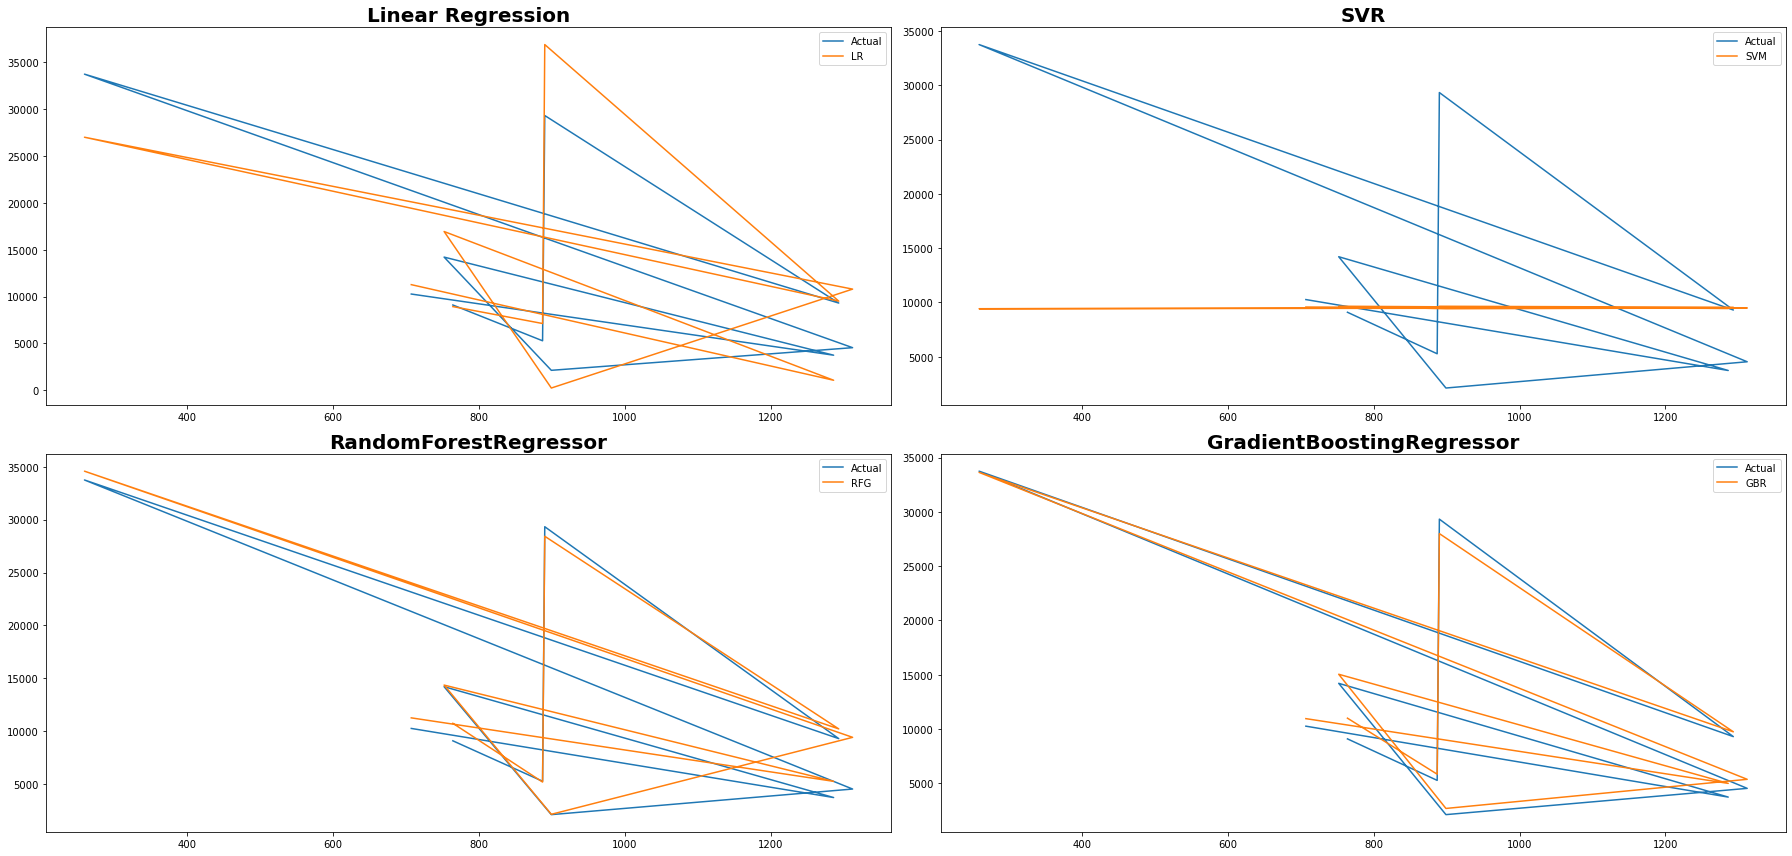

In [78]:
plt.figure(figsize=(25,12))

plt.subplot(221)
plt.plot(df1['Actual'].iloc[0:10],label='Actual')
plt.plot(df1['LR'].iloc[0:10],label='LR')
plt.legend()
plt.title("Linear Regression",fontweight='bold', fontsize=20)

plt.subplot(222)
plt.plot(df1['Actual'].iloc[0:10],label='Actual')
plt.plot(df1['SVM'].iloc[0:10],label='SVM')
plt.legend()
plt.title('SVR',fontweight='bold', fontsize=20)


plt.subplot(223)
plt.plot(df1['Actual'].iloc[0:10],label='Actual')
plt.plot(df1['RFG'].iloc[0:10],label='RFG')
plt.legend()
plt.title('RandomForestRegressor',fontweight='bold', fontsize=20)


plt.subplot(224)
plt.plot(df1['Actual'].iloc[0:10],label='Actual')
plt.plot(df1['GBR'].iloc[0:10],label='GBR')
plt.legend()
plt.title('GradientBoostingRegressor',fontweight='bold', fontsize=20)

plt.tight_layout()



#### Evaluate Model

In [79]:
from sklearn import metrics

In [81]:
lrscore = metrics.r2_score(y_test,y_pred1)
svmscore = metrics.r2_score(y_test,y_pred2)
rfgscore = metrics.r2_score(y_test,y_pred3)
gbrscore = metrics.r2_score(y_test,y_pred4)

In [82]:
print(lrscore,svmscore,rfgscore,gbrscore)

0.7833463107364538 -0.07229762787861826 0.8646550913178251 0.8779726251291786


In [83]:
mseLR = metrics.mean_absolute_error(y_test,y_pred1)
mseSVM = metrics.mean_absolute_error(y_test,y_pred2)
mseRFG = metrics.mean_absolute_error(y_test,y_pred3)
mseGBR = metrics.mean_absolute_error(y_test,y_pred4)

print(mseLR,mseSVM,mseRFG,mseGBR)

4186.5088983664355 8592.428727899724 2498.6951788563124 2447.951558054584


#### Predict charges for new customer

In [89]:
test1 = X.head(1)
test1

,age,sex,bmi,children,smoker,region
0,19,0,27.9,0,1,1


In [90]:
new_pred = gbr.predict(test1)
new_pred

array([17792.46608893])

In [91]:
data.head(1)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.9,0,1,1,16884.924


### Save model using joblib

In [93]:
gbr = GradientBoostingRegressor()
gbr.fit(X,y)

GradientBoostingRegressor()

In [94]:
import joblib


In [95]:
joblib.dump(gbr,'model_gbr')

['model_gbr']

In [96]:
model = joblib.load('model_gbr')

In [97]:
model.predict(test1)

array([18901.83209496])

### GUI

python GUI.py